## Evoke Motorcycles DataLog analysis template

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io 
# Replace 'file_name.txt' with the name of your txt file
test_data_path = 'C:\\Users\\admin\\Documents\\GitHub\\Pyhton_Jupiter\\Data\\Battery\\M1.5 WinRaw.txt'

with open(test_data_path, 'r') as file:
    file_cotent = file.read()

# Now let's look for the point where there is the word "block0"
block0_position = file_cotent.find('block0')
if block0_position !=-1:
    data_afterBlock0 = file_cotent[block0_position :]
else:
    data_afterBlock0 = file_cotent
# Read the data after block 0
df = pd.read_csv(io.StringIO(data_afterBlock0))

# Iterate through each column and split them based on ";"
for col in df.columns:
    Data =df[col].str.split(';', expand=True)

# keep only the colunm from 1 to 30
Data =Data.iloc[:, 1:31]
# print(Data)
# Remove all data where there is an empty space 
Data.dropna( 
    how='all',
    axis=0,
    inplace= True)

#print(Data.info())
# # #Data.columns = ['a', 'b']
# Let's use the second method to rename the colunms in the dataframe
Data.rename(columns = {1:'Odometer', 2:'Trip', 3:'Speed kmh', 4:'Is in Reverse', 5:'Riding Mode',  6:'MCU Current',  7:'BMS Current', 8:'Vehicle status byte1', 9:'Vehicle status byte2', 10:'Throttle',
                       11:'MCU Temp', 12:'Motor temp', 13:'Pack Voltage',  14: 'BMS Cell Highest Voltage value', 15: 'BMS Cell Lowest Voltage value', 16:'SOC', 17:'RPM', 18:'Avg MOSTFet temp', 19: '12V voltage', 20:'Charger Volt', 21:'Charger Current', 22: 'Num Ative ERROR', 23: 'Sum Active ERROR', 24: 'Input Head light', 25: 'Turn left', 26: 'Turn Right', 27:'Mode Switch', 27: 'Kick Stand', 28: 'Kill switch', 29:'Key', 30:'Brake'}, inplace = True)

                       




## Plotting the Pack voltage
The pack voltage from the BMS 

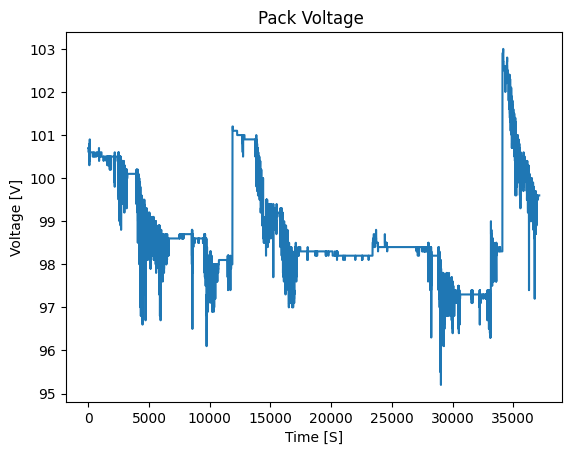

In [27]:
plt.plot(Data['Pack Voltage'].astype(float))
plt.title('Pack Voltage ')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

## Plotting the current from the BMS 

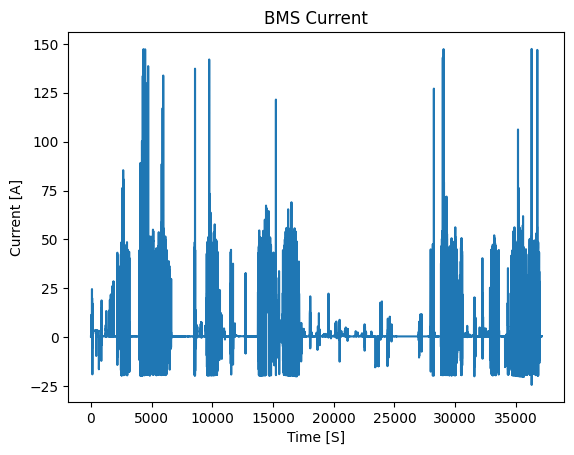

In [7]:
plt.plot(Data['BMS Current'].astype(float))
plt.title('BMS Current')
plt.xlabel('Time [S]')
plt.ylabel('Current [A]')
plt.show()

## Plotting the phase current 

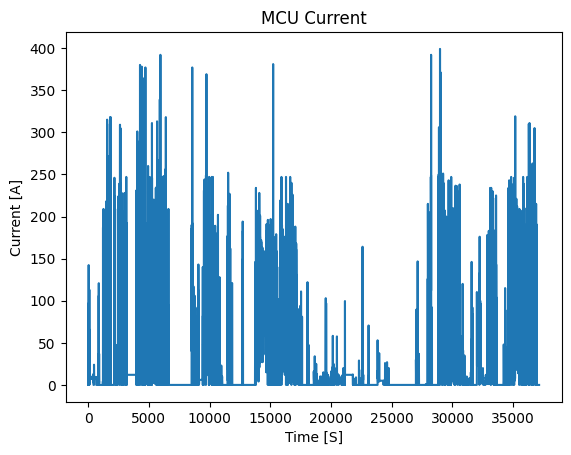

In [8]:
plt.plot(Data['MCU Current'].astype(float))
plt.title('MCU Current')
plt.xlabel('Time [S]')
plt.ylabel('Current [A]')
plt.show()

## Plotting the odometer values
the odometer value is coming wiht some other data such as addresses and time, we first need to split the data and keep the odometer values 


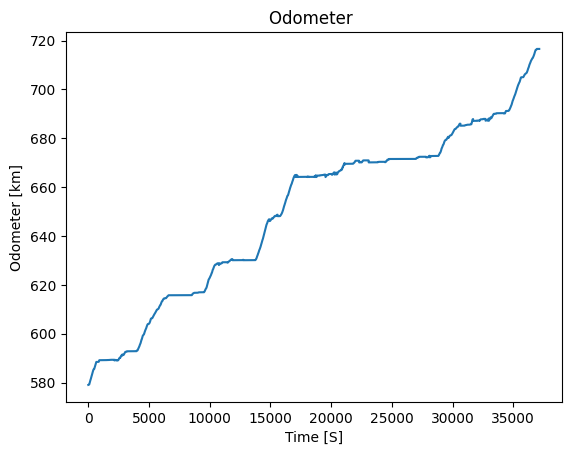

In [9]:
# Odometer_val =[]
# for col in Data['Odometer']:
#     Odometer_val.append(col.split(' ')[2])

plt.plot(Data['Odometer'].astype(float))
plt.title('Odometer ')
plt.xlabel('Time [S]')
plt.ylabel('Odometer [km]')
plt.show()

# plotting the Trips of the vehicle


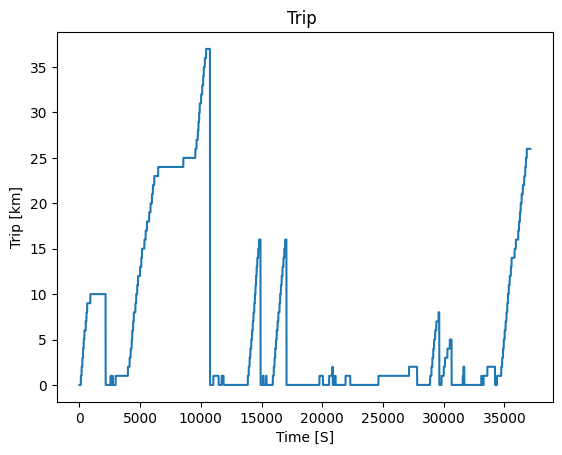

In [10]:
plt.plot(Data['Trip'].astype(float))
plt.title('Trip ')
plt.xlabel('Time [S]')
plt.ylabel('Trip [km]')
plt.show()

## Speed of the vehicle

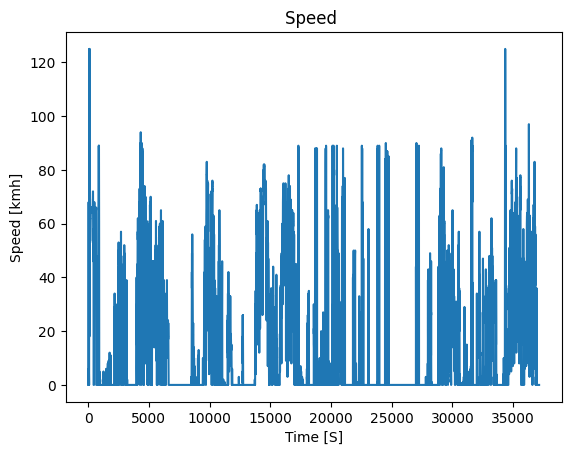

In [11]:
plt.plot(Data['Speed kmh'].astype(float))
plt.title('Speed ')
plt.xlabel('Time [S]')
plt.ylabel('Speed [kmh]')
plt.show()

## RPM of the Vehicle

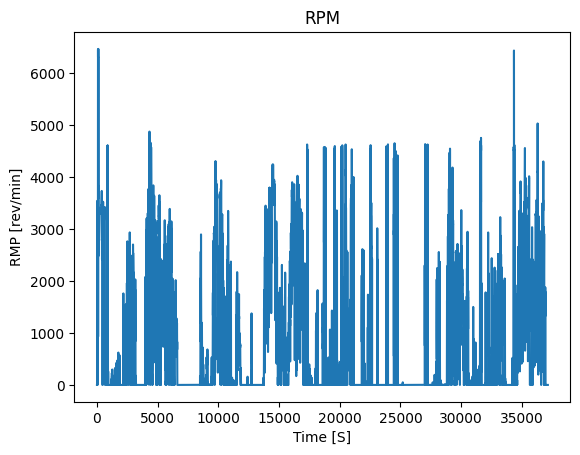

In [12]:
plt.plot(Data['RPM'].astype(float))
plt.title('RPM')
plt.xlabel('Time [S]')
plt.ylabel('RMP [rev/min]')
plt.show()

## The Throttle Position

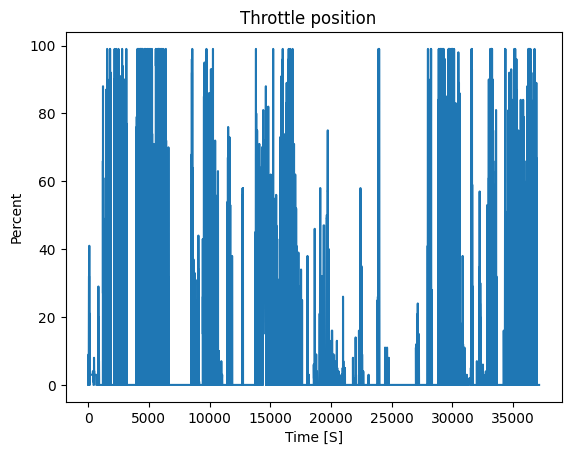

In [13]:
plt.plot(Data['Throttle'].astype(float))
plt.title('Throttle position  ')
plt.xlabel('Time [S]')
plt.ylabel('Percent')
plt.show()

## The Motor temperature

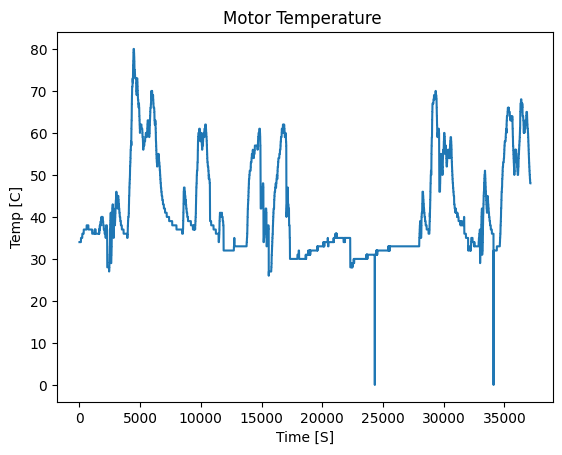

In [14]:
plt.plot(Data['Motor temp'].astype(float))
plt.title('Motor Temperature ')
plt.xlabel('Time [S]')
plt.ylabel('Temp [C]')
plt.show()

## Motor Controller or MCU temperature

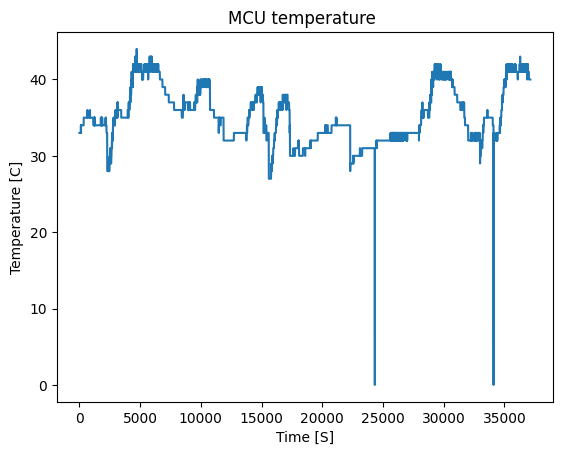

In [15]:
plt.plot(Data['MCU Temp'].astype(float))
plt.title('MCU temperature ')
plt.xlabel('Time [S]')
plt.ylabel('Temperature [C]')
plt.show()

## BMS Cell Highest Voltage value

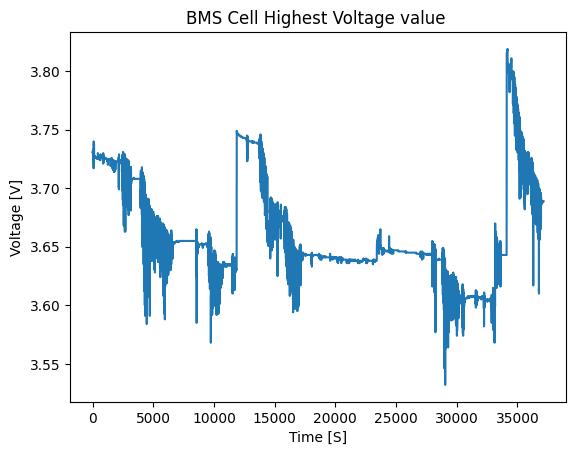

In [16]:
plt.plot((Data['BMS Cell Highest Voltage value'].astype(float)+200)/100)
plt.title('BMS Cell Highest Voltage value ')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

## BMS Cell Lowest Voltage value

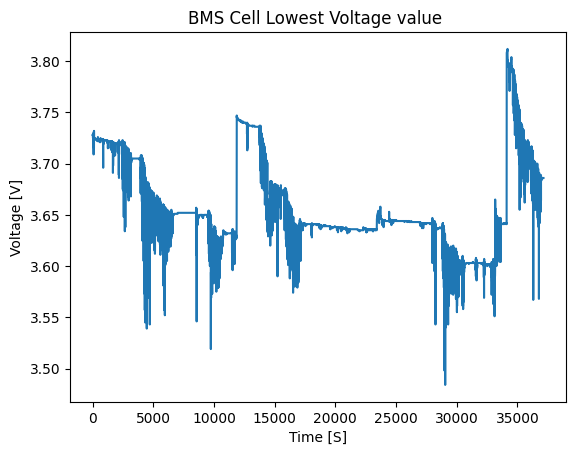

In [17]:
plt.plot((Data['BMS Cell Lowest Voltage value'].astype(float)+200)/100)
plt.title('BMS Cell Lowest Voltage value ')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

## Plotting the Pack SOC 

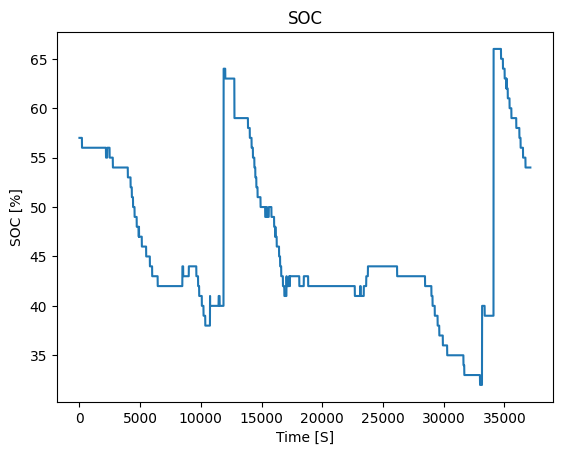

In [18]:
plt.plot(Data['SOC'].astype(float))
plt.title('SOC')
plt.xlabel('Time [S]')
plt.ylabel('SOC [%]')
plt.show()

## Plotting the 12V battery voltage  

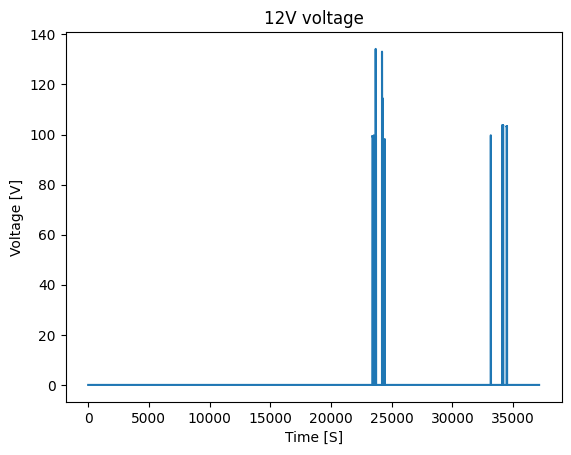

In [19]:
plt.plot(Data['12V voltage'].astype(float)/10) 
plt.title('12V voltage')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

## Plotting the riding mode of the vehicle
- M1.5 Riding mode 

    0. is the  ECO mode
    1. is the D mode which is the City mode of the URS
    2. is the Sport mode also called boost mode
   
- Classic
    0.  ECO
    1.  City 
    2. Pro
    3. RGN




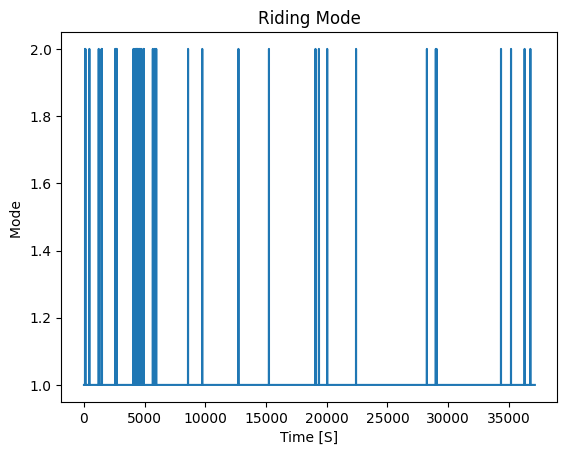

In [20]:
plt.plot(Data['Riding Mode'].astype(float))
plt.title('Riding Mode')
plt.xlabel('Time [S]')
plt.ylabel('Mode ')
plt.show()

## Plotting the brake signal 
- 0 : Is break low
- 1 : Is break High

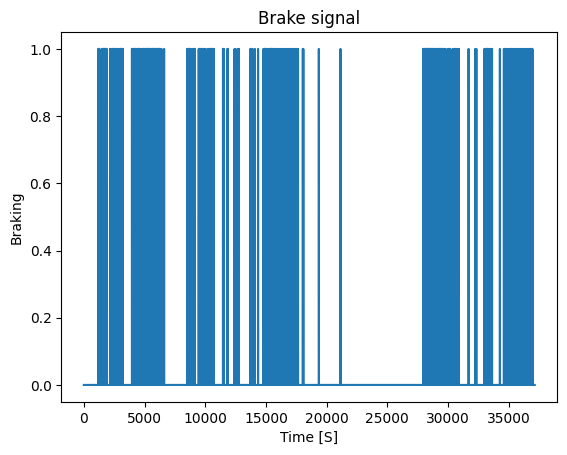

In [21]:
plt.plot(Data['Brake'].astype(int))
plt.title('Brake signal')
plt.xlabel('Time [S]')
plt.ylabel('Braking')
plt.show()

## plotting the vehicle status


In [ ]:
City_Mode = []
Pro_Mode = []
ECO_Mode = []
BMS_CON = []
MCU_CON1 = []
Time_sec = range(0, len(Data['Vehicle status byte2']), 1) 
for i in Data['Vehicle status byte2'].astype(int):
    ECO_Mode.append(bin(i)[6])
    City_Mode.append(bin(i)[8])  # City Mode
    Pro_Mode.append(bin(i)[7])
    BMS_CON.append(bin(i)[4])
    MCU_CON1.append(bin(i)[3])
fig, (City_M, Pro_M, Eco_M)= plt.subplots(3, sharex=True)
City_M.plot(Time_sec, City_Mode)
Pro_M.plot(Time_sec, Pro_Mode)
Eco_M.plot(Time_sec, ECO_Mode)
City_M.set_ylabel('City Mode')
Pro_M.set_ylabel('PRO Mode')
Eco_M.set_ylabel('ECO Mode')
fig.suptitle('Riding Mode')
plt.xlabel('Time [S]')
plt.show()
